<a href="https://colab.research.google.com/github/jungyoojang/MachineLearning/blob/main/7_2_%EC%8B%AC%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심층 신경망

2개 이상의 층을 포함한 신경망

종종 다층 인공 신경망, 심층 신경망, 딥러닝을 같은 의미로 사용

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 2개의 층

데이터 준비

In [ ]:
from tensorflow import keras # 패션 MNIST 데이터

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

데이터 전처리

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0 # 전처리
train_scaled = train_scaled.reshape(-1, 28*28)
# 검증세트 수동으로 덜어내기
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

2개의 층을 이용해서 심층 신경망을 만들어보자

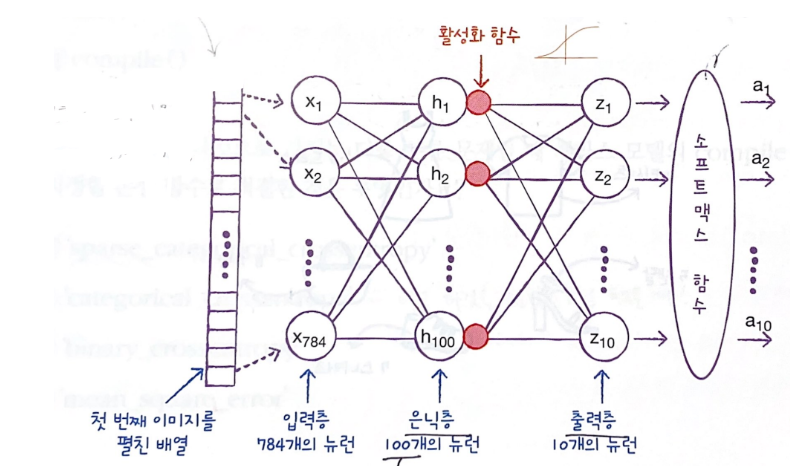

**은닉층(Hidden layer)**

입력층과 출력층 사이에 있는 모든 층

출력층에서는 소프트맥스나 시그모이드 함수를 써야 함

그러나 은닉층은 활성화 함수의 선택이 자유로움

**왜 은닉층에 활성화 함수를 적용하는가?**

활성화 함수없이 은닉층만 있다면 의미가 없기 때문

## 심층 신경망 만들기

**심층신경망 만들기 (1)**

dense1: 은닉층, 100개의 뉴런을 가지는 밀집층

은닉층의 뉴런 개수를 정하는 데는 특별한 기준이 없음

따라서 몇 개의 뉴런을 두어야 할지 판단하기 위해서는 상당한 경험이 필요함

한 가지 제약 사항은 적어도 출력층의 뉴런보다는 많게 만들어야 함

dense2: 출력층, 10개의 클래스를 분류하므로 10개의 뉴런을 설정하고 활성화 함수로 소프트맥스 함수를 지정

또한 첫 번째 밀집층이 아니므로 input_shape를 지정할 필요가 없음

In [ ]:
# 층이 2개
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)) # 그림만 보고 코딩 가능해야 함
dense2 = keras.layers.Dense(10, activation='softmax')

In [ ]:
# 심층신경망 모델 만들기
model = keras.Sequential([dense1, dense2])

인공 신경망의 강력한 성능은 이렇게 층을 리스트로 추가하여 입력 데이터에 대해 연속적인 학습을 진행하는 능력에서 나옴

- summary(): 모델에 대한 유용한 정보 확인 가능

In [ ]:
model.summary() #Param 계산할 수 있어야 함.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sequential" <- 모델 이름

이 모델에 들어 있는 층이 순서대로 나열

층마다 층 이름, 클래스, 출력 크기, 모델 파라미터 개수가 출력

층을 만들 때 name 매개변수로 이름 지정 가능

미지정시 자동으로 dense라고 이름을 붙임

- **Output Shape** : (경사하강법 배치크기, 출력 유닛 개수)

현재 샘플 개수가 아직 정의되어 있지 않기 때문에 None임

(784,)은 한 샘플의 크기를 뜻하는 거지 샘플의 수를 뜻하지 않음

케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러 번에 걸쳐 경사 하강법 단계를 수행

즉, 미니배치 경사 하강법을 사용

케라스의 기본 미니매치 크기는 32이며 fit() 메서드에서 batch_size 매개변수로 바꿀 수 있음

따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연학 대응할 수 있도록 None으로 설정

이렇게 신경망 중에 입력되거나 출력되는 배열의 첫 번째 차원을 **배치 차원**이라고 함

- **Param** : 모델 파라미터, 즉 각 층의 가중치&절편의 개수를 보여줌.

즉, 샘플마다 784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축됨

1st 층 = 784 * 100 (가중치) + 100(절편) = 78,500

2nd 층 = 100 * 10 (가중치) + 10(절편) = 1,010

모델 파라미터 개수

(입력값 개수 + 1) * 뉴런 개수

## 층을 추가하는 다른 방법

**심층신경망 만들기 (2)**

따로 Dense 클래스를 만들지 않고

추가되는 층을 한눈에 손쉽게 알아볼 수 있음

모델의 이름과는 다르게 층의 이름은 반드시 영문이어야 함

Dense() 클래스를 Sequential() 안에서 바로 사용

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델') # 모델과 층 이름(영문만) 지정

In [ ]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


편리하나 아주 많은 층을 추가하려면 Sequential 클래스의 생성자가 매우 길어짐

또 조건에 따라 층을 추가할 수도 없음

**층을 추가하는 또 다른 방법**

**심층신경망 만들기(3)**

제일 많이 사용하는 방법

**add()**로 원하는 만큼 추가

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary() # summary만 보고 모델 코딩 가능해야함

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 11s 3ms/step - loss: 0.5710 - accuracy: 0.8064
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4132 - accuracy: 0.8509
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3776 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3530 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3344 - accuracy: 0.8782


In [ ]:
# 모델 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3607 - accuracy: 0.8669


[0.36067989468574524, 0.8669166564941406]

활성화 함수를 바꿔보자

초창기 인공 신경망의 은닉층에 많이 사용된 함수는 시그모이드이나 단점이 있음

이 함수의 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기 때문에 올바른 출력을 만드는 데 신속하게 대응을 하지 못함

특히 층이 많은 심층신경망일수록 그 효과가 누적되어 학습을 더 어렵게 함

이를 개선하기 위해 다른 조율의 활성화 함수인 **렐루 함수**가 제안됨



## 렐루 활성화 함수

렐루 함수는 max(0, z)와 같이 쓸 수도 있음

이 함수는 z가 0보다 크면, z를 출력하고 z가 0보다 작으면 0을 출력

렐루 함수는 특히 이미지 처리에 좋은 성능을 낸다고 알려짐

**심층 신경망 만들기(4)**

**Flatten 층**

입력데이터를 1차원으로 펼쳐주는 유틸리티 층

지금까지 2차원 이상의 넘파이 배열의 데이터를 reshape() 메서드를 이용해 1차원으로 변경함

Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 함

데이터의 첫 번째 축(0번 축)을 배치 축(batch axis)또는 배치 차원이라고 부름

입력에 곱해지는 가중치나 절편이 없어서 성능에 기여하는 것은 없음

그러나 Flateen 클래스는 입력층과 은닉층 사이에 추가되기 때문에 층이라 부름

하지만 Flatten 클래스는 학습하는 층이 아니므로 이 신경망의 깊이가 3인 신경망이라고 하지는 않음


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28))) # 입력 데이터 1차원으로
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary() # 입력값의 차원 짐작가능

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


첫 번째 등장하는 Flatten 클래스에 포함된 모델 파라미터는 0개

케라스의 Flatten층을 신경망 모델에 추가하면 입력값의 차원을 짐작할 수 있음

케라스 API는 입력 데이터에 대한 전처리 과정을 될 수 있으면 모델에 포함시킴

훈련 데이터 재생성

이전과 다른점은 reshape()메서드를 사용하지 않음

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
# reshape() 사용 X
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5290 - accuracy: 0.8113
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3920 - accuracy: 0.8576
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3525 - accuracy: 0.8726
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3301 - accuracy: 0.8821
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3141 - accuracy: 0.8867


시그모이드 함수를 사용했을 때 보다 약간 성능이 향상됨

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3683 - accuracy: 0.8726


[0.3683287501335144, 0.8725833296775818]

## 옵티마이저

신경망의 가중치와 절편을 학습하기 위한 알고리즘 또는 방법

사용할 경사 하강법 알고리즘과 그 파라미터를 지정하는 매개변수

신경망에는 **하이퍼파라미터**가 많음

추가할 은닉층의 개수, 은닉층의 뉴런 개수, 사용할 활성화 함수, 사용할 층의 종류,

fit 메서드의 미니배치 개수, epochs 매개변수

complie() 메서드의 경사 하강법 알고리즘도 하이퍼파라미터

케라스의 기본 세팅된 경사 하강법 알고리즘은 RMSprop이고 RmSprop의 학습률 또한 하이퍼하라미터

케라스는 다양한 종류의 경사 하강법 알고리즘(4-2절 참고)을 제공하여 이들을 옵티마이저라고 함

옵티마이저는 자세히는 X 쓰는 방법과 대략적인 개념만 알기

**적응적 학습률**

최적점에 가까워질수록 학습률을 낮추는 효율적인 방식

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

**SGD 경사하강법 최적화**

학습률 조절

sgd = keras.optimizers.SGD(learning_rate=0.1)#기본값은 0.01

In [ ]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

**모멘텀 최적화**

모멘텀(관성, 운동량) 조절

sgd = keras.optimizers.SGD(momentum=0.9)#기본값은 0

새로운 가중치와 절편을 계산할 때, 과거의 가중치와 절편의 변화량을 어느 정도 반영할 것인지 결정함

간단히 말하면 한 번에 이동하는 가중치와 절편의 크기에 영향을 줌

여기서 표시된 loss는 절대 제곱 오차

**네스테로프 모멘텀 최적화**

sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)#기본값은 0

모멘텀 최적화를 2번 반복하여 구현

In [ ]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

**Adagrad**

그레이언트 제곱을 누적하여 학습률을 나눔

누적 초기값은 initial_accumulator_value

In [ ]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

**RMSprop**


In [ ]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

**Adam**

모멘텀 최적화와 RMSprop의 장점을 접목한 것

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5266 - accuracy: 0.8154
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3957 - accuracy: 0.8588
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3564 - accuracy: 0.8705
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3280 - accuracy: 0.8796
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3085 - accuracy: 0.8851


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3485 - accuracy: 0.8763


[0.3484817445278168, 0.8762500286102295]

# 정리

인공신경망을 더 업그레이드 하기로 함 = 심층신경망

입력층과 출력층 사이에 은닉층 추가

-> (1) 객체로 만들고 전달

-> (2) Sequential 내에서 바로 생성

-> (3) 객체는 아니고 add 메소드로 전달

-> 렐루 활성화함수 + Flatten 층 도입

-> 옵티마이저